In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch

In [2]:
d = pd.read_csv('BNS_full - Winter.csv')
d = pd.concat([d, pd.read_csv('NSBH_full - Winter.csv')], ignore_index=True)
d.to_csv('All - Winter.csv')

In [8]:
len(d)

329

In [2]:
d = pd.read_csv('full2.csv')
np.median(d.Mean_Dist)

301.8591607

(array([ 0.,  5., 28., 44., 48., 49., 36., 36., 38., 14.,  7.,  3.,  9.,
         4.,  3.,  3.,  1.,  1.,  0.]),
 array([   0.        ,   52.63157895,  105.26315789,  157.89473684,
         210.52631579,  263.15789474,  315.78947368,  368.42105263,
         421.05263158,  473.68421053,  526.31578947,  578.94736842,
         631.57894737,  684.21052632,  736.84210526,  789.47368421,
         842.10526316,  894.73684211,  947.36842105, 1000.        ]),
 <BarContainer object of 19 artists>)

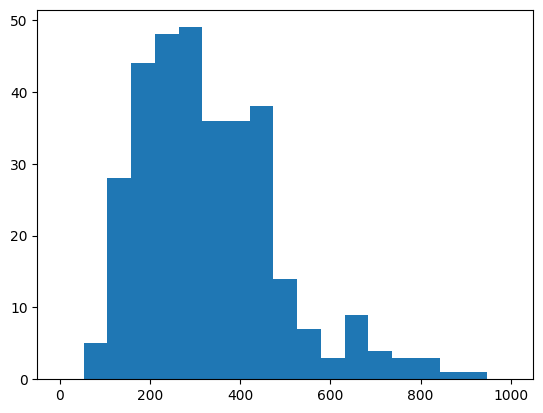

In [4]:
plt.hist(d.Mean_Dist,bins=np.linspace(0,1000,20))

In [5]:
q=d

np.mean(q.P_massfill/q.P_2d)

1.1584930204775885

In [6]:
md = np.median(d.Mean_Dist)
ma = np.median(d.DegArea)

q1 = d[(d.Mean_Dist <= md) & (d.DegArea <= ma)]
q2 = d[(d.Mean_Dist > md) & (d.DegArea <= ma)]
q3 = d[(d.Mean_Dist <= md) & (d.DegArea > ma)]
q4 = d[(d.Mean_Dist > md) & (d.DegArea > ma)]

len(q1)
ma, md

(1596.1498302295447, 301.8591607143771)

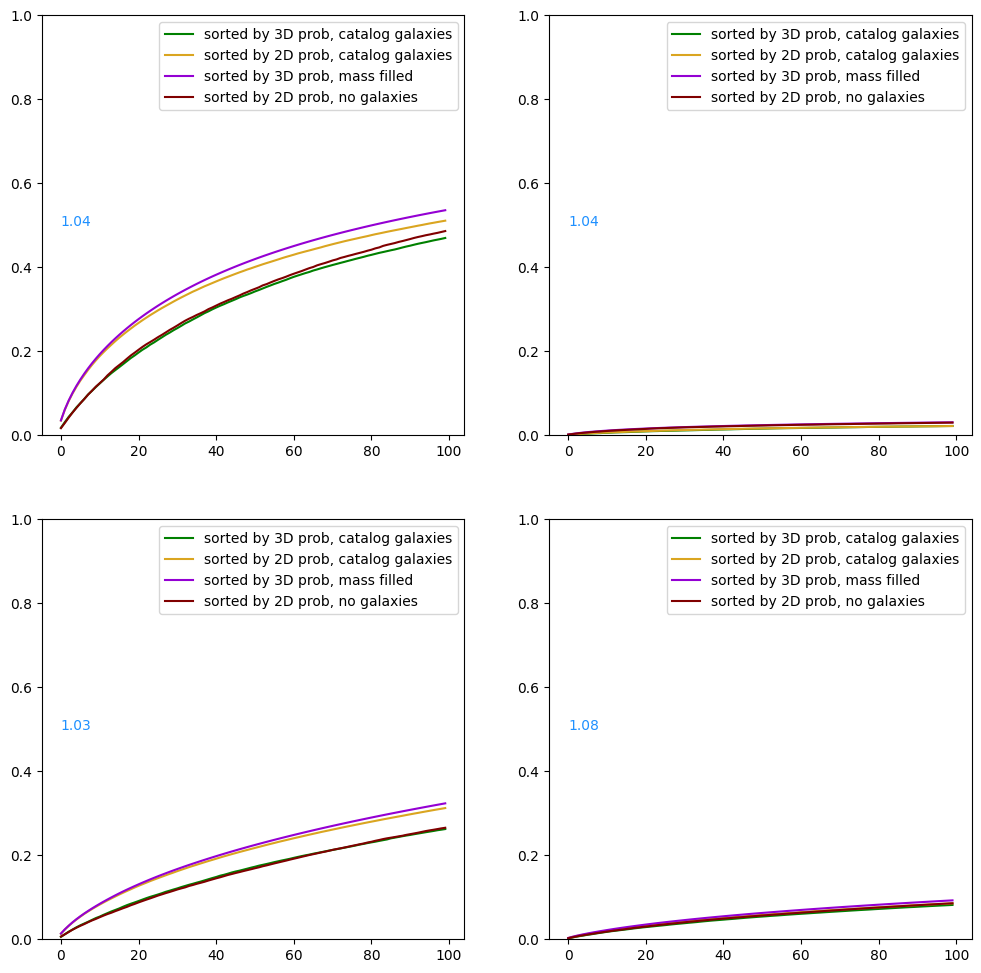

In [5]:
md = np.median(d.Mean_Dist)
ma = np.median(d.DegArea)

#md, ma = 225, ma


q1 = d[(d.Mean_Dist <= md) & (d.DegArea <= ma)]
q2 = d[(d.Mean_Dist > md) & (d.DegArea <= ma)]
q3 = d[(d.Mean_Dist <= md) & (d.DegArea > ma)]
q4 = d[(d.Mean_Dist > md) & (d.DegArea > ma)]

nobs = 100

q0 = [q1,q2,q3,q4]



fig, axs = plt.subplots(nrows=2, ncols=2, layout=None, figsize=(12,12))
i=0
for ax in axs.flat:
    q = q0[i]
    i+=1
    a1 = np.zeros(nobs)
    a2 = np.zeros(nobs)
    a3 = np.zeros(nobs)
    a4 = np.zeros(nobs)


    for k in list(q['BNS_num']):
        try:
            cs = pd.read_csv('BNS_GalCat/BNS_{}.csv'.format(int(k)))
        except:
            try:
                cs = pd.read_csv('BNS_GalCat/NSBH_{}.csv'.format(int(k)))
            except:
                continue
                
        sigma_m_nonempty, sigma_m_empty_nodist, sigma_m_empty_dist = np.array(cs['Filled3D']), np.array(cs['Unfilled2D']), np.array(cs['Unfilled3D'])

        order_dist = np.flip(np.argsort(sigma_m_empty_dist)[-nobs:])
        order_nodist = np.flip(np.argsort(sigma_m_empty_nodist)[-nobs:])
        order_all = np.flip(np.argsort(sigma_m_nonempty)[-nobs:])


        fullsum = np.sum(sigma_m_nonempty)
        a1 += np.cumsum((sigma_m_nonempty)[order_nodist]) / fullsum
        a2 += np.cumsum((sigma_m_nonempty)[order_dist]) / fullsum
        a3 += np.cumsum((sigma_m_nonempty)[order_all]) / fullsum
        a4 += np.cumsum((sigma_m_nonempty)[:nobs]) / fullsum

    if 1:
        
        ax.plot(a1/len(q), color='green', label='sorted by 3D prob, catalog galaxies')
        ax.plot(a2/len(q), color='goldenrod', label = 'sorted by 2D prob, catalog galaxies')
        ax.plot(a3/len(q), color='darkviolet', label = 'sorted by 3D prob, mass filled')
        ax.plot(a4/len(q), color='maroon', label = 'sorted by 2D prob, no galaxies')
        ax.legend()
        ax.text(0, 0.5, np.round(np.min(np.sum(a3)/np.array([np.sum(a1), np.sum(a2), np.sum(a4)])) , 2), color='dodgerblue')
        #ax.xlabel('Observation Number')
        #ax.ylabel('3D prob*galaxy mass (filled+catalog) covered')
        ax.set_ylim(0,1)
        #plt.title('BNS {}'.format(k))
        #plt.show()

        #print(k, a3[-1], a1[-1], a2[-1])

# 

In [19]:
np.where(np.isnan(d.DegArea))

(array([342]),)

In [20]:
d.loc[342]

Unnamed: 0.1    342.0
Unnamed: 0        NaN
BNS_num           NaN
Mean_Dist         NaN
P_massfill        NaN
P_3dcat           NaN
P_2dcat           NaN
Area99            NaN
DegArea           NaN
P_2d              NaN
NSBH_num          NaN
Name: 342, dtype: float64

In [7]:
f = d.copy()

In [8]:
d = d[d.P_massfill/d.P_3dcat < 3]

In [6]:
f[f.P_massfill/f.P_3dcat > 3]

,Unnamed: 0.1,Unnamed: 0,BNS_num,Mean_Dist,P_massfill,P_3dcat,P_2dcat,Area99,DegArea,P_2d,NSBH_num
11,11,11.0,79.0,197.530132,0.617000,0.202000,0.211000,1872.0,776.384462,0.542887,NaN
68,68,68.0,357.0,117.082918,0.925484,0.277118,0.282767,346.0,138.548753,0.913492,NaN
106,106,106.0,559.0,319.194000,0.854910,0.101644,0.103829,1143.0,830.663000,0.842442,NaN
481,481,NaN,NaN,390.864276,0.422648,0.023573,0.025566,3817.0,1998.944431,0.418481,931.0
550,550,NaN,NaN,422.836765,0.318817,0.076365,0.078776,5341.0,2234.798603,0.313119,1368.0
554,554,NaN,NaN,591.411580,0.436975,0.062703,0.058343,4271.0,2014.589359,0.434484,1388.0


In [38]:
dist = np.arange(150,501,25)
degs = np.arange(250,3000,250)

q_arr = np.zeros((4, len(dist), len(degs)))





for m in range(len(dist)):
    for j in range(len(degs)):

        md, ma = dist[m], degs[j]


        q1 = d[(d.Mean_Dist <= md) & (d.DegArea <= ma)]
        q2 = d[(d.Mean_Dist > md) & (d.DegArea <= ma)]
        q3 = d[(d.Mean_Dist <= md) & (d.DegArea > ma)]
        q4 = d[(d.Mean_Dist > md) & (d.DegArea > ma)]

        nobs = 100

        q0 = [q1,q2,q3,q4]



        #fig, axs = plt.subplots(nrows=2, ncols=2, layout=None, figsize=(12,12))
        #i=0
        for i in range(4):
            q = q0[i]
            #i+=1
            a1 = np.zeros(nobs)
            a2 = np.zeros(nobs)
            a3 = np.zeros(nobs)
            a4 = np.zeros(nobs)
            
            full = list(q['NSBH_num'])+list(q['BNS_num'])

            for k in full:
                try:
                    cs = pd.read_csv('BNS_GalCat/BNS_{}.csv'.format(int(k)))
                except:
                    try:
                        cs = pd.read_csv('BNS_GalCat/NSBH_{}.csv'.format(int(k)))
                    except:
                        continue
                sigma_m_nonempty, sigma_m_empty_nodist, sigma_m_empty_dist = np.array(cs['Filled3D']), np.array(cs['Unfilled2D']), np.array(cs['Unfilled3D'])

                order_dist = np.flip(np.argsort(sigma_m_empty_dist)[-nobs:])
                order_nodist = np.flip(np.argsort(sigma_m_empty_nodist)[-nobs:])
                order_all = np.flip(np.argsort(sigma_m_nonempty)[-nobs:])


                fullsum = np.sum(sigma_m_nonempty)
                a1 += np.cumsum((sigma_m_nonempty)[order_nodist]) / fullsum
                a2 += np.cumsum((sigma_m_nonempty)[order_dist]) / fullsum
                a3 += np.cumsum((sigma_m_nonempty)[order_all]) / fullsum
                a4 += np.cumsum((sigma_m_nonempty)[:nobs]) / fullsum

            if 1:

                s = np.round(np.min(np.sum(a3)/np.array([np.sum(a1), np.sum(a2), np.sum(a4)])) , 3)
            q_arr[i,m,j] = s
            
            print(m,j)

                #print(k, a3[-1], a1[-1], a2[-1])

0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 2
0 2
0 2
0 2
0 3
0 3
0 3
0 3
0 4
0 4
0 4
0 4
0 5
0 5
0 5
0 5
0 6
0 6
0 6
0 6
0 7
0 7
0 7
0 7
0 8
0 8
0 8
0 8
0 9
0 9
0 9
0 9
0 10
0 10
0 10
0 10
1 0
1 0
1 0
1 0
1 1
1 1
1 1
1 1
1 2
1 2
1 2
1 2
1 3
1 3
1 3
1 3
1 4
1 4
1 4
1 4
1 5
1 5
1 5
1 5
1 6
1 6
1 6
1 6
1 7
1 7
1 7
1 7
1 8
1 8
1 8
1 8
1 9
1 9
1 9
1 9
1 10
1 10
1 10
1 10
2 0
2 0
2 0
2 0
2 1
2 1
2 1
2 1
2 2
2 2
2 2
2 2
2 3
2 3
2 3
2 3
2 4
2 4
2 4
2 4
2 5
2 5
2 5
2 5
2 6
2 6
2 6
2 6
2 7
2 7
2 7
2 7
2 8
2 8
2 8
2 8
2 9
2 9
2 9
2 9
2 10
2 10
2 10
2 10
3 0
3 0
3 0
3 0
3 1
3 1
3 1
3 1
3 2
3 2
3 2
3 2
3 3
3 3
3 3
3 3
3 4
3 4
3 4
3 4
3 5
3 5
3 5
3 5
3 6
3 6
3 6
3 6
3 7
3 7
3 7
3 7
3 8
3 8
3 8
3 8
3 9
3 9
3 9
3 9
3 10
3 10
3 10
3 10
4 0
4 0
4 0
4 0
4 1
4 1
4 1
4 1
4 2
4 2
4 2
4 2
4 3
4 3
4 3
4 3
4 4
4 4
4 4
4 4
4 5
4 5
4 5
4 5
4 6
4 6
4 6
4 6
4 7
4 7
4 7
4 7
4 8
4 8
4 8
4 8
4 9
4 9
4 9
4 9
4 10
4 10
4 10
4 10
5 0
5 0
5 0
5 0
5 1
5 1
5 1
5 1
5 2
5 2
5 2
5 2
5 3
5 3
5 3
5 3
5 4
5 4
5 4
5 4
5 5
5 5
5 5
5 5
5 6


In [32]:
i

4

In [42]:
t = q_arr

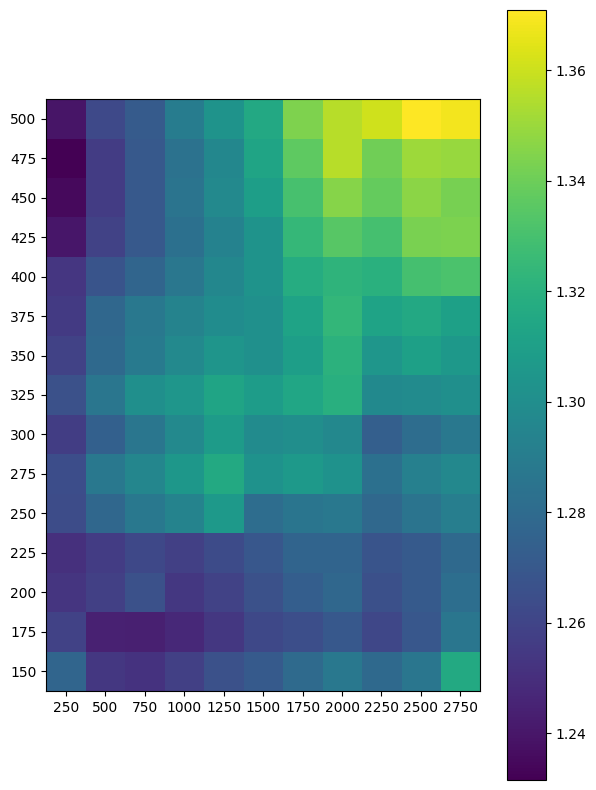

In [56]:
plt.figure(figsize=(7,10))
plt.imshow(q_arr[3]*q_arr[2]*q_arr[1]*q_arr[0], origin='lower')
plt.xticks(np.arange(11), labels=degs)
plt.yticks(np.arange(15), labels=dist)
plt.colorbar()

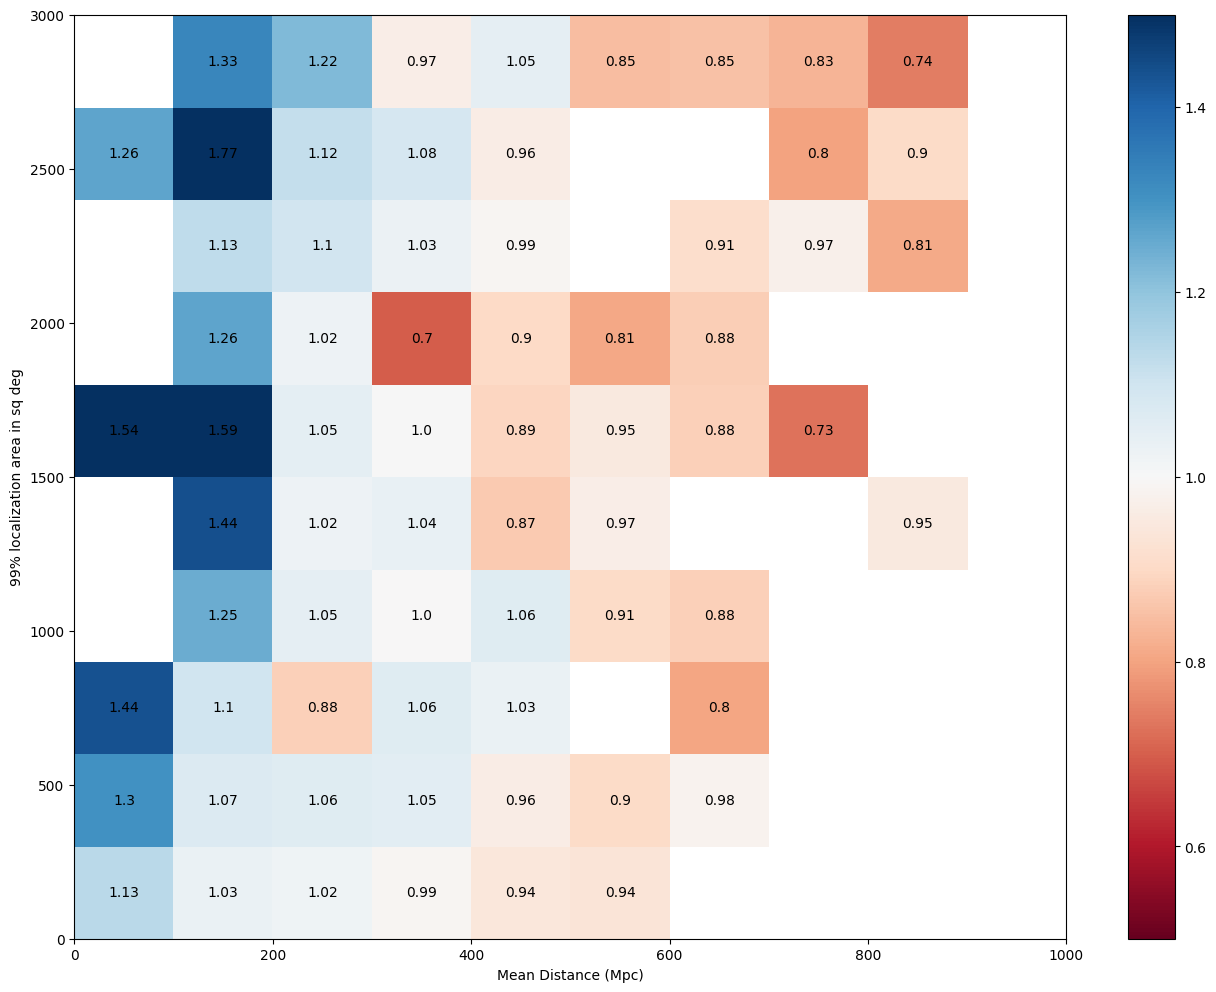

In [6]:
import numpy as np
import matplotlib.pyplot as plt
m = np.zeros((10,10))


dr = np.arange(100,1001,100)
ta = np.arange(300,3001,300)

for i in range(len(dr)):
    for j in range(len(ta)):
        n = d[(np.abs(d.Mean_Dist - dr[i]) <= 25) & (np.abs(d.DegArea - ta[j]) <= 150)]
        if j == len(ta) - 1:
            n = d[(np.abs(d.Mean_Dist - dr[i]) <= 25) & (d.DegArea - ta[j] >= -150)]
        if len(n) != 0:
            m[j,i] = np.mean(n.P_2dcat/n.P_2d)
        else:
            m[j,i] = np.nan
            

            
size = 10
# data = np.clip(m,0,2)
data = m

# Limits for the extent
x_start = 0
x_end = 1000
y_start = 0
y_end = 3000

extent = [x_start, x_end, y_start, y_end]

# The normal figure
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
im = ax.imshow(data, extent=extent, origin='lower', interpolation='None', cmap='RdBu', aspect='auto', vmin=0.5,vmax=1.5)#, vmax=2)

# Add the text
jump_x = (x_end - x_start) / (2.0 * size)
jump_y = (y_end - y_start) / (2.0 * size)
x_positions = np.linspace(start=x_start, stop=x_end, num=size, endpoint=False)
y_positions = np.linspace(start=y_start, stop=y_end, num=size, endpoint=False)

for y_index, y in enumerate(y_positions):
    for x_index, x in enumerate(x_positions):
        label = data[y_index, x_index]
        text_x = x + jump_x
        text_y = y + jump_y
        if not np.isnan(label): 
            ax.text(text_x, text_y, np.round(label,2), color='black', ha='center', va='center')

fig.colorbar(im)
plt.ylabel('99% localization area in sq deg')
plt.xlabel('Mean Distance (Mpc)')
plt.show()

In [3]:
d

,Unnamed: 0,num,Area99,Mean_Dist,P_massfill,P_3dcat,P_2dcat,DegArea,P_2d,P_onlymass,P_2dcat_dcut,P_massdcut
0,0,53,1949,473.707123,0.562937,0.537332,0.544450,1325.740432,0.541277,0.143135,0.544612,0.137486
1,1,155,974,206.154490,0.511334,0.496890,0.404117,419.868948,0.451273,0.092637,0.470625,0.112477
2,2,160,3168,313.347133,0.299909,0.281573,0.241998,1836.620108,0.255050,0.057569,0.263414,0.067958
3,3,165,3277,431.218823,0.380633,0.366626,0.363475,2083.621128,0.359280,0.044761,0.369488,0.045004
4,4,192,6551,498.024542,0.143322,0.124772,0.118441,3279.468005,0.130154,0.014935,0.124219,0.015314
...,...,...,...,...,...,...,...,...,...,...,...,...
324,324,8148,4902,329.206801,0.213434,0.200972,0.187987,2788.678882,0.179852,0.029607,0.190356,0.053270
325,325,8157,5956,422.991410,0.254069,0.229048,0.227785,3339.765891,0.239720,0.029009,0.231626,0.029854
326,326,8165,3882,268.601100,0.309858,0.303317,0.237299,2193.502813,0.231271,0.029591,0.279084,0.113326
327,327,8183,4818,293.895627,0.774505,0.756952,0.751237,3280.372867,0.751146,0.047684,0.758805,0.028229


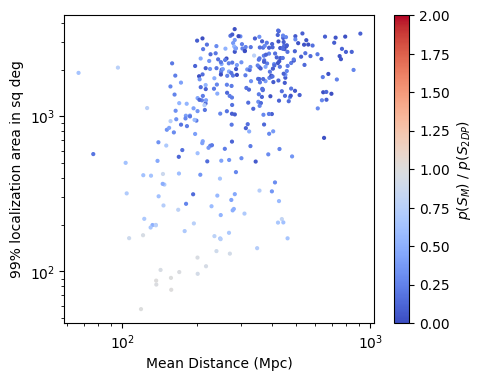

In [14]:
a=10
if a==1:
    d = pd.read_csv('Sept/full-GIT100.csv')
else:
    d = pd.read_csv('Sept/full-WINTER100.csv')

plt.figure(figsize=(5,4))
plt.scatter(d.Mean_Dist, d.DegArea, c= d.P_massdcut/d.P_2d, vmin=0., vmax=2, cmap='coolwarm',s=4)
plt.ylabel('99% localization area in sq deg')
plt.xlabel('Mean Distance (Mpc)')
plt.xscale('log')
plt.yscale('log')
plt.colorbar(label = "$p \\left( {S_{M}}\\right)\\ /\\ p \\left( {S_{2DP}}\\right) $")

In [15]:
np.median(d.DegArea)

1596.14983

In [35]:
d1 = d[d.Mean_Dist <= 350]
d2 = d[d.Mean_Dist >= 350]

In [2]:
d00 = pd.read_csv('Sept/full-WINTER100.csv')

d1 = d00[d00.Mean_Dist <= 302]
d2 = d00[d00.Mean_Dist >= 302]
print(*np.round(np.percentile(d1.P_massdcut, [25, 50, 75]), 3), sep=' , ')
print(*np.round(np.percentile(d2.P_massdcut, [25, 50, 75]), 3), sep=' , ')

0.097 , 0.168 , 0.48
0.039 , 0.066 , 0.1


In [5]:
np.max(d00.Mean_Dist)

910.4034795

Text(0, 0.5, 'Increase on sorting by 2D alone over 2D + catalog')

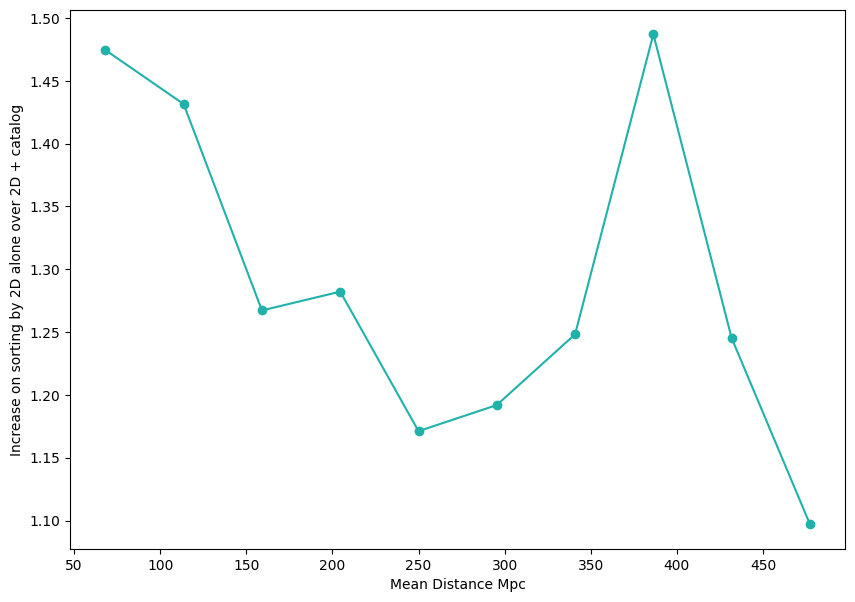

In [104]:
q=d

def binplot(x, y, x1, x2, n):
    y = np.array(y)
    x = np.array(x)
    xmid = [x1 + (i+0.5)*(x2 - x1)/n for i in range(n)]
    yarr = []
    for m in xmid:
        ynew = y[np.where(np.abs(x - m) <= (x2-x1)/2/n)]
        yarr.append(np.mean(ynew))
    #print(xmid,yarr)   
    plt.plot(xmid, yarr, marker = 'o', color='lightseagreen')
    #plt.show()

plt.figure(figsize=(10,7))
binplot(q.Mean_Dist, 1/q.P_3dcat*q.P_massfill, 0, 500, 11)
plt.xlabel('Mean Distance Mpc')
plt.ylabel('Increase on sorting by 2D alone over 2D + catalog')

In [10]:
d.reset_index(drop=True, inplace=True)

# Violin Plots:

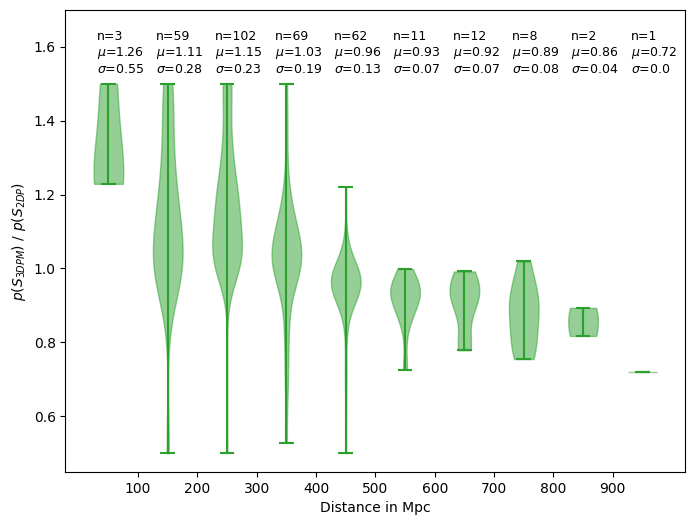

In [9]:
a=1
if a==1:
    d = pd.read_csv('Sept/full-GIT100.csv')
else:
    d = pd.read_csv('Sept/full-WINTER100.csv')

#d0 = pd.read_csv('full3.csv')
arr = d.P_3dcat/d.P_2d
#arr = 1/arr
upsat = 1.5
downsat = 0.5

#arr = np.array(1/arr)
gsat1 = [list(arr[np.where(np.abs(d.Mean_Dist - m)<=50)[0]]) for m in range(50,1000,100)]
gsat2 = [list(arr[np.where(np.abs(d.DegArea - 3*m)<=150)[0]]) for m in range(100,1000,100)]
arr = np.clip(arr, downsat, upsat)

#arr = d.P_massfill/np.array([max(d.P_3dcat[i], d.P_2dcat[i], d.P_2d[i]) for i in range(len(d))])

grouped = [list(arr[np.where(np.abs(d.Mean_Dist - m)<=50)[0]]) for m in range(50,1000,100)]

fig, ax = plt.subplots(figsize=(8,6))  ## ----- 6 for GIT, 4.5 for WINTER
parts = ax.violinplot(grouped)

light, dark, smth = 'bisque', 'orange', 'raw 2D'
light, dark, smth = 'lightpink', 'palevioletred', '2D catalogue'

dark = 'C2'

for pc in parts['bodies']:
    pc.set_facecolor(dark)
    pc.set_edgecolor(dark)
    pc.set_alpha(0.5)
parts['cbars'].set_edgecolor(dark)
parts['cmaxes'].set_edgecolor(dark)
parts['cmins'].set_edgecolor(dark)

gsat = gsat1
for i in range(1,11):
    txt = 'n='+str(len(grouped[i-1])) + '\n$\mu$='+ str(np.round(np.median(gsat[i-1]),2)) + '\n$\sigma$=' + str(np.round(np.std(gsat[i-1]),2))
    plt.text(i-0.2, upsat+0.03, txt, color='k',fontsize=9)

ax.set_xticks(np.arange(1.5,10.5,1), labels = np.arange(100,1000,100))
plt.xlabel('Distance in Mpc')
plt.ylabel('$p \\left( {S_{3DPM}}\\right)\\ /\\ p \\left( {S_{2DP}}\\right) $')
#plt.yscale('log')
plt.ylim(downsat-0.05, upsat+0.2)
plt.show()

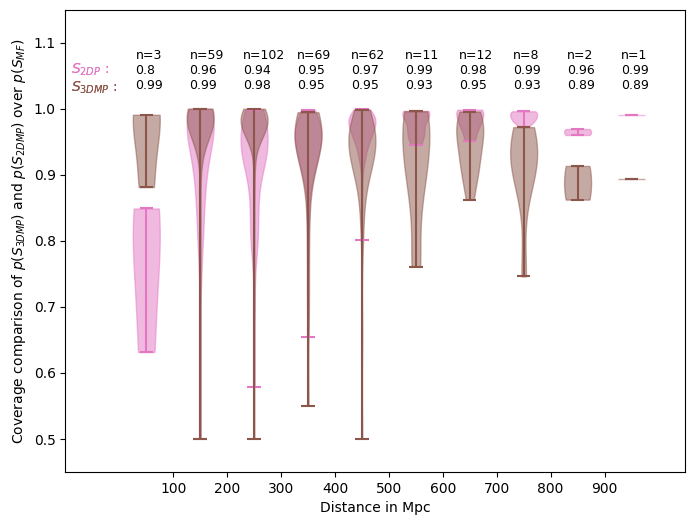

In [87]:
a=2
if a==1:
    d = pd.read_csv('full2.csv')
else:
    d = pd.read_csv('full2 - WINTER.csv')

fig, ax = plt.subplots(figsize=(8,6))    



arr = d.P_2d/d.P_massfill
upsat = 1
downsat = 0.5
gsat1 = [list(arr[np.where(np.abs(d.Mean_Dist - m)<=50)[0]]) for m in range(50,1000,100)]
arr = np.clip(arr, downsat, upsat)
grouped = [list(arr[np.where(np.abs(d.Mean_Dist - m)<=50)[0]]) for m in range(50,1000,100)]
parts = ax.violinplot(grouped)
dark = 'C6'
for pc in parts['bodies']:
    pc.set_facecolor(dark)
    pc.set_edgecolor(dark)
    pc.set_alpha(0.5)
parts['cbars'].set_edgecolor(dark)
parts['cmaxes'].set_edgecolor(dark)
parts['cmins'].set_edgecolor(dark)




arr = d.P_2dcat/d.P_massfill
upsat = 1
downsat = 0.5
gsat2 = [list(arr[np.where(np.abs(d.Mean_Dist - m)<=50)[0]]) for m in range(50,1000,100)]
arr = np.clip(arr, downsat, upsat)
grouped = [list(arr[np.where(np.abs(d.Mean_Dist - m)<=50)[0]]) for m in range(50,1000,100)]
parts = ax.violinplot(grouped)
dark = 'C5'
for pc in parts['bodies']:
    pc.set_facecolor(dark)
    pc.set_edgecolor(dark)
    pc.set_alpha(0.5)
parts['cbars'].set_edgecolor(dark)
parts['cmaxes'].set_edgecolor(dark)
parts['cmins'].set_edgecolor(dark)


gsat = gsat1
for i in range(1,11):
    #txt = 'n='+str(len(grouped[i-1])) + '\n$S_{2DP}$ : '+ str(np.round(np.median(gsat1[i-1]),2)) + '\n$S_{3DMP}$ : ' + str(np.round(np.median(gsat2[i-1]),2))
    txt = 'n='+str(len(grouped[i-1])) + '\n'+ str(np.round(np.median(gsat1[i-1]),2)) + '\n' + str(np.round(np.median(gsat2[i-1]),2))
    plt.text(i-0.2, upsat+0.03, txt, color='k',fontsize=9)

plt.text(-0.4, upsat+0.027, '\n'+'\n$S_{3DMP}$ : ', fontsize=10, color='C5')
plt.text(-0.4, upsat+0.027, '\n$S_{2DP}$ : '+'\n', fontsize=10, color='C6')
plt.text(-0.4, upsat+0.027, '\n'+'\n$S_{3DMP}$ : ', fontsize=10, color='C5')
plt.text(-0.4, upsat+0.027, '\n$S_{2DP}$ : '+'\n', fontsize=10, color='C6')

ax.set_xticks(np.arange(1.5,10.5,1), labels = np.arange(100,1000,100))
plt.xlabel('Distance in Mpc')
plt.ylabel('Coverage comparison of $p\\left( {S_{3DMP}}\\right)$ and $p \\left( {S_{2DMP}}\\right) $ over $p \\left( {S_{MF}}\\right) $')
#plt.yscale('log')
plt.ylim(0.45, upsat+0.15)
plt.xlim(-0.5,11)
plt.show()

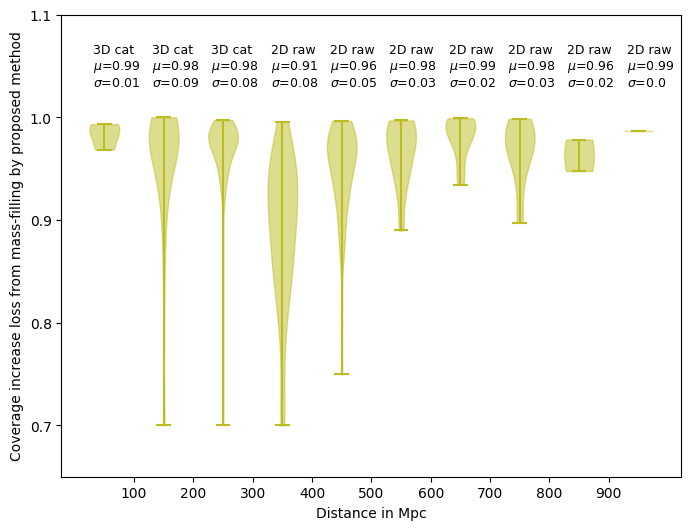

In [37]:
a=1
if a==1:
    d = pd.read_csv('Sept/full-GIT100.csv')
else:
    d = pd.read_csv('Sept/full-WINTER100.csv')

arr = d.P_2dcat/d.P_massfill

upsat = 1

arr = np.array(1/arr)


prb = []
for i in range(len(d)):
    if d.Mean_Dist[i] <= 302:
        prb.append(d.P_3dcat[i])
    else:
        prb.append(d.P_2d[i])

arr = d.P_massfill/np.array([max(d.P_3dcat[i], d.P_2dcat[i], d.P_2d[i]) for i in range(len(d))])
arr = d.P_massfill/prb
arr = np.array(1/arr)
gsat1 = [list(arr[np.where(np.abs(d.Mean_Dist - m)<=50)[0]]) for m in range(50,1000,100)]
gsat2 = [list(arr[np.where(np.abs(d.DegArea - 3*m)<=150)[0]]) for m in range(50,1000,100)]


arr = np.clip(arr, 0.7, upsat)



which = np.array([np.argmax([d.P_3dcat[i], d.P_2dcat[i], d.P_2d[i]]) for i in range(len(d))])

grouped = [list(arr[np.where(np.abs(d.Mean_Dist - m)<=50)[0]]) for m in range(50,1000,100)]

members = [list([np.where(np.abs(d.Mean_Dist - m)<=50)[0]]) for m in range(50,1000,100)]



fig, ax = plt.subplots(figsize=(8,6))
parts = ax.violinplot(grouped)

light, dark, smth = 'turquoise', 'teal', 'best of 3'
light, dark, smth = 'lightcoral', 'tab:red', 'other 3'

dark = 'C8'
for pc in parts['bodies']:
    pc.set_facecolor(dark)
    pc.set_edgecolor(dark)
    pc.set_alpha(0.5)
parts['cbars'].set_edgecolor(dark)
parts['cmaxes'].set_edgecolor(dark)
parts['cmins'].set_edgecolor(dark)

gsat = gsat1
for i in range(1,11):
    curr = which[members[i-1]]
    u, v, w = len(np.where(curr == 0)[0]), len(np.where(curr == 1)[0]), len(np.where(curr == 2)[0])
    mx = np.argmax([u,v,w])
    if mx==0 and i!=4:
        txt='3D cat'
    if mx==1 and i!=4:
        txt='3D cat'
    if mx==2 or i==4:
        txt='2D raw'
    #str(np.round(max(u,v,w)/len(curr[0]), 2)) + '\n'
    #txt += '\n'  + str(len(grouped[i-1]))
    #txt += '\nm='+ str(np.round(np.mean(gsat[i-1]),2)) + '\ns=' + str(np.round(np.std(gsat[i-1]),2))
    txt = txt + '\n$\mu$='+ str(np.round(np.median(gsat[i-1]),2)) + '\n$\sigma$=' + str(np.round(np.std(gsat[i-1]),2))
    plt.text(i-0.2, upsat+0.03, txt, color='k', fontsize=9)

ax.set_xticks(np.arange(1.5, 10,1), labels = np.arange(100,1000,100))
plt.xlabel('Distance in Mpc')
plt.ylabel('Coverage increase loss from mass-filling by proposed method')
#plt.yscale('log')
plt.ylim(0.65,1.1)
plt.show()

## Percentage of Benefitting Maps:

### By Distance:

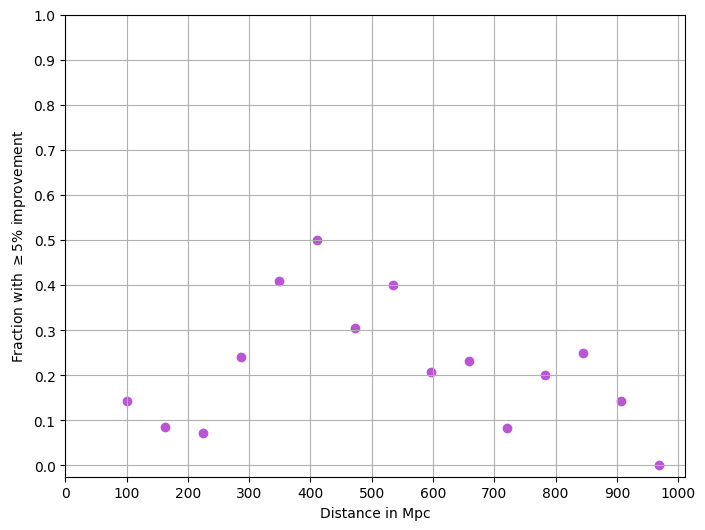

In [153]:
arr = d.P_3dcat/d.P_massfill
arr = d.P_massfill/np.array([max(d.P_3dcat[i], d.P_2dcat[i], d.P_2d[i]) for i in range(len(d))])
#arr = 1/arr

gl = int(1000/16)
grouped = [list(arr[np.where(np.abs(d.Mean_Dist - m)<=gl/2)[0]]) for m in range(100,1000,gl)]

thres = 1.05

plt.figure(figsize=(8,6))

h=0
for g in grouped:
    try:
        plt.scatter(100+gl*h, len(np.where(np.array(g)>=thres)[0])/len(g), color='mediumorchid')
        
    except:
        pass
    h+=1

plt.xlabel('Distance in Mpc')
plt.ylabel('Fraction with $\geq${}% improvement'.format(int((thres-1)*100)))
plt.xticks(np.arange(0,1001,100))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid()

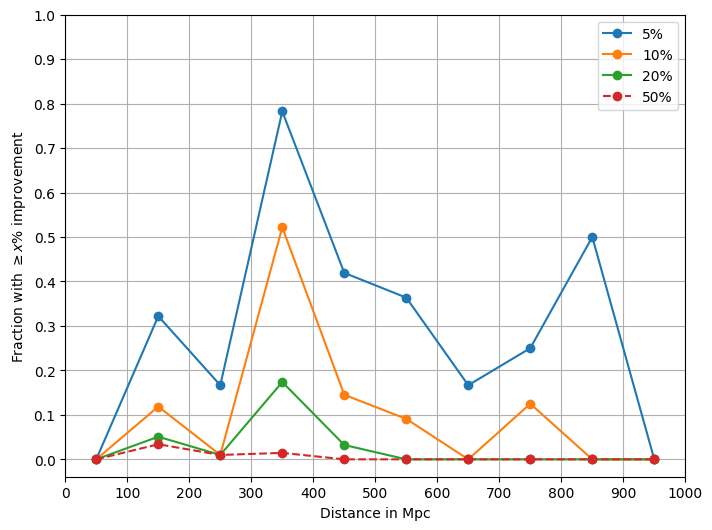

In [38]:
arr = d.P_3dcat/d.P_massfill
arr = d.P_massfill/np.array([max(d.P_3dcat[i], d.P_2dcat[i], d.P_2d[i]) for i in range(len(d))])
#arr = 1/arr


arr = d.P_massfill/prb

size = 10
gl = int(1000/(size+1))
grouped = [list(arr[np.where(np.abs(d.Mean_Dist - m)<=50)[0]]) for m in range(50,1000,100)]



plt.figure(figsize=(8,6))

al = []
tlist = [1.05, 1.1, 1.200000000000001,1.5000000001]
for thres in tlist:
    new = []
    for g in grouped:
        try:
            #plt.scatter(100+gl*h, len(np.where(np.array(g)>=thres)[0])/len(g), color='mediumorchid')
            new.append(len(np.where(np.array(g)>=thres)[0])/len(g))      
        except:
            pass
    al.append(new)


cols = ['r', 'g', 'b', 'y']
for ai in range(len(al)):
    a = al[ai]
    if ai == 3:
        plt.plot(np.arange(50,1000,100), a, label = str(int((tlist[ai]-1)*100))+'%', marker='o', linestyle='dashed')
        break
    plt.plot(np.arange(50,1000,100), a, label = str(int((tlist[ai]-1)*100))+'%', marker='o')
plt.xlabel('Distance in Mpc')
plt.ylabel('Fraction with $\geq x$% improvement')
plt.xticks(np.arange(0,1001,100))
plt.yticks(np.arange(0,1.1,0.1))
plt.legend()
plt.grid()

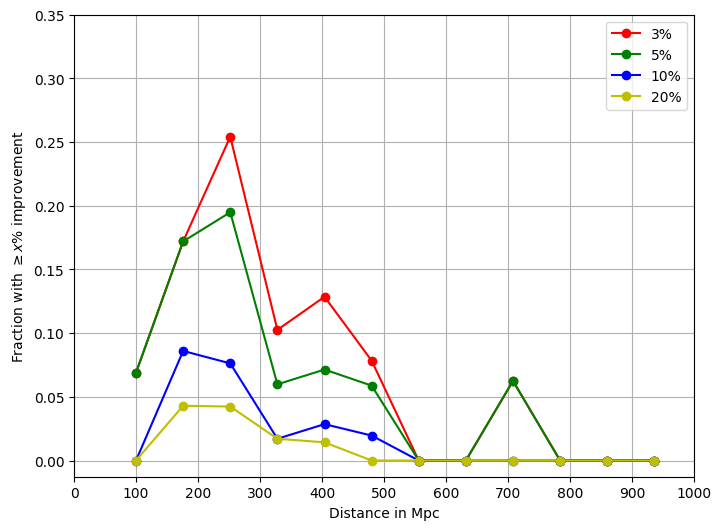

In [160]:
arr = d.P_3dcat/d.P_2d
arr = d.P_massfill/np.array([max(d.P_3dcat[i], d.P_2dcat[i], d.P_2d[i]) for i in range(len(d))])
#arr = 1/arr
arr = d.P_3dcat/d.P_2d

size = 12
gl = int(1000/(size+1))
grouped = [list(arr[np.where(np.abs(d.Mean_Dist - m)<=gl/2)[0]]) for m in range(100,1000,gl)]



plt.figure(figsize=(8,6))

al = []
tlist = [1.03, 1.05, 1.1, 1.200000000000001]
for thres in tlist:
    new = []
    for g in grouped:
        try:
            #plt.scatter(100+gl*h, len(np.where(np.array(g)>=thres)[0])/len(g), color='mediumorchid')
            new.append(len(np.where(np.array(g)>=thres)[0])/len(g))      
        except:
            pass
    al.append(new)


cols = ['r', 'g', 'b', 'y']
for ai in range(len(al)):
    a = al[ai]
    plt.plot(100+gl*np.arange(size), a, color = cols[ai], label = str(int((tlist[ai]-1)*100))+'%', marker='o')
plt.xlabel('Distance in Mpc')
plt.ylabel('Fraction with $\geq x$% improvement')
plt.xticks(np.arange(0,1001,100))
plt.yticks(np.arange(0,0.4,0.05))
plt.legend()
plt.grid()

### By Area:

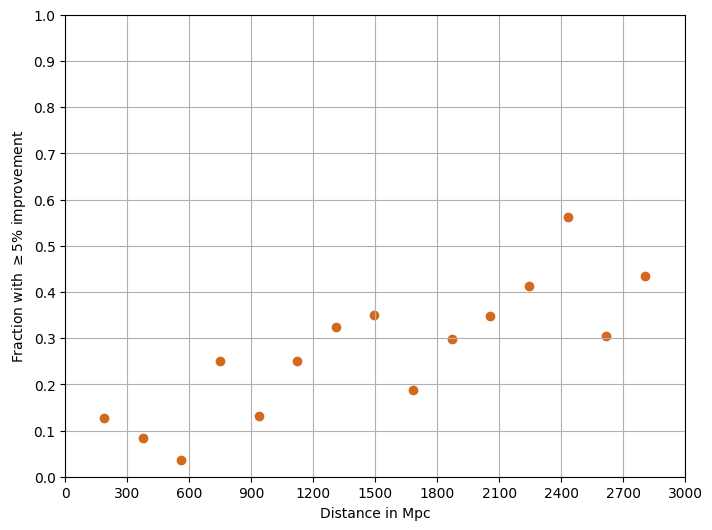

In [145]:
arr = d.P_3dcat/d.P_massfill
arr = d.P_massfill/np.array([max(d.P_3dcat[i], d.P_2dcat[i], d.P_2d[i]) for i in range(len(d))])
#arr = 1/arr

gl = int(3000/16)
grouped = [list(arr[np.where(np.abs(d.DegArea - m)<=gl/2)[0]]) for m in range(300,3000,gl)]

thres = 1.05

plt.figure(figsize=(8,6))

h=1
for g in grouped:
    try:
        plt.scatter(gl*h, len(np.where(np.array(g)>=thres)[0])/len(g), color='chocolate')
    except:
        pass
    h+=1

plt.xlabel('Distance in Mpc')
plt.ylabel('Fraction with $\geq${}% improvement'.format(int((thres-1)*100)))
plt.xticks(np.arange(0,3001,300))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid()

In [76]:
d[d.P_massfill/d.P_3dcat>5]

,Unnamed: 0.1,Unnamed: 0,BNS_num,Mean_Dist,P_massfill,P_3dcat,P_2dcat,Area99,DegArea,P_2d,NSBH_num
106,106,106.0,559.0,319.194000,0.854910,0.101644,0.103829,1143.0,830.663000,0.842442,NaN
481,481,NaN,NaN,390.864276,0.422648,0.023573,0.025566,3817.0,1998.944431,0.418481,931.0
554,554,NaN,NaN,591.411580,0.436975,0.062703,0.058343,4271.0,2014.589359,0.434484,1388.0


In [69]:
[len(i) for i in grouped]

[38, 128, 155, 92, 46, 36, 17, 11, 7]

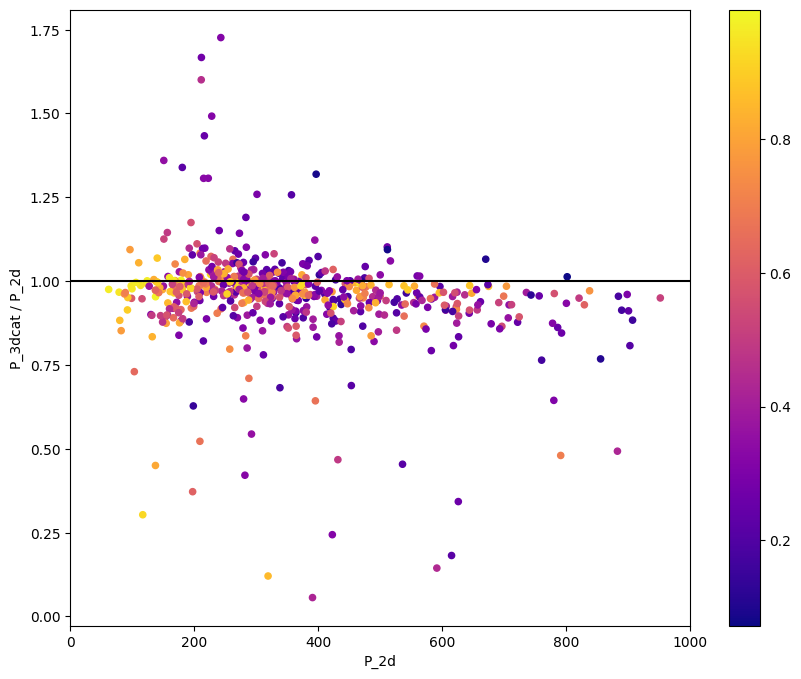

In [64]:
b = 'P_' + '3dcat'
a = 'P_' + '2d'

#a,b=b,a

plt.figure(figsize=(10,8))

plt.scatter(d.Mean_Dist, d[b]/d[a],  c = d.P_massfill, cmap='plasma', s=20)#, vmax=4000)
plt.plot([0,1000], [1,1], color='k')
plt.colorbar()
plt.xlabel(a)
plt.ylabel(b+' / '+a)
plt.xlim(0,1000)
#plt.ylim(0.8,2)
plt.show()

In [212]:
np.mean(d.P_massfill/d.P_3dcat)

1.2671615647183512

In [79]:
d.loc[np.where(np.abs(d.Mean_Dist - 650)<50)[0]]

,Unnamed: 0,Event_num,Mean_Dist,P_massfill,P_3dcat,P_2dcat,P_2d,DegArea
55,55,NSBH 300,605.35,0.158,0.128,0.124,0.139897,7624.771308
57,57,NSBH 69,622.73,0.561,0.514,0.513,0.556538,1145.345103
59,59,NSBH 633,670.26,0.099,0.088,0.087,0.082599,4958.248758
64,64,NSBH 177,615.15,0.217,0.039,0.038,0.214523,4614.847182
67,67,NSBH 730,623.01,0.735,0.669,0.622,0.730513,3989.902474
72,72,NSBH 797,696.31,0.537,0.461,0.427,0.532818,915.169266
74,74,NSBH 859,699.19,0.679,0.647,0.616,0.677351,2466.115353
85,85,NSBH 1021,616.90,0.176,0.153,0.153,0.168207,4703.051527
91,91,NSBH 1085,626.52,0.241,0.190,0.180,0.227811,1523.642868
93,93,NSBH 1067,626.58,0.513,0.456,0.454,0.508917,1927.814432


In [160]:
d = pd.read_csv('All.csv')
d

,Unnamed: 0,Event_num,Mean_Dist,P_massfill,P_3dcat,P_2dcat,P_2d,DegArea
0,0,BNS 33,298.21,0.221,0.184,0.215,0.183246,2764.129590
1,1,BNS 40,103.48,0.642,0.374,0.639,0.506843,2713.876980
2,2,BNS 55,228.32,0.321,0.268,0.314,0.180973,4297.673481
3,3,BNS 77,214.84,0.222,0.155,0.219,0.182602,1740.035956
4,4,BNS 88,424.51,0.196,0.167,0.175,0.180832,2948.380417
...,...,...,...,...,...,...,...,...
98,98,NSBH 718,485.10,0.836,0.816,0.820,0.825545,621.259691
99,99,NSBH 721,506.84,0.450,0.400,0.390,0.444990,2083.568672
100,100,NSBH 735,441.35,0.345,0.313,0.311,0.328535,2035.597887
101,101,NSBH 748,674.78,0.867,0.850,0.833,0.863540,234.346069


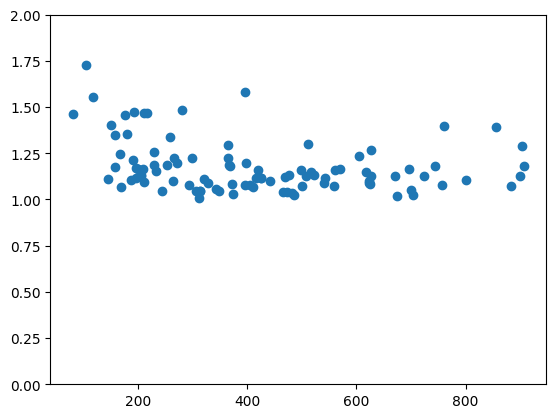

In [51]:
plt.scatter(d.Mean_Dist, d.P_massfill/d.P_3dcat)
plt.ylim(0,2)
plt.show()

In [29]:
import seaborn as sns

/tmp/ipykernel_3164/3765423504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dn['ndist'] = np.round(dn['Mean_Dist']/k)*k
/tmp/ipykernel_3164/3765423504.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dn['ratio'] = dn['P_massfill']/dn['P_2d']


<AxesSubplot: xlabel='ndist', ylabel='ratio'>

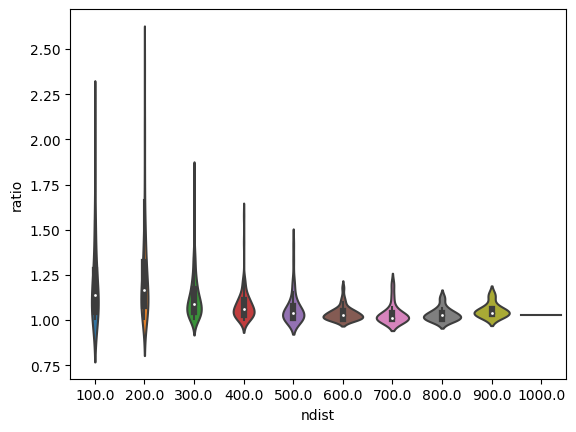

In [44]:
k=100

dn['ndist'] = np.round(dn['Mean_Dist']/k)*k
dn['ratio'] = dn['P_massfill']/dn['P_2d']
sns.violinplot(dn, x='ndist',y='ratio')

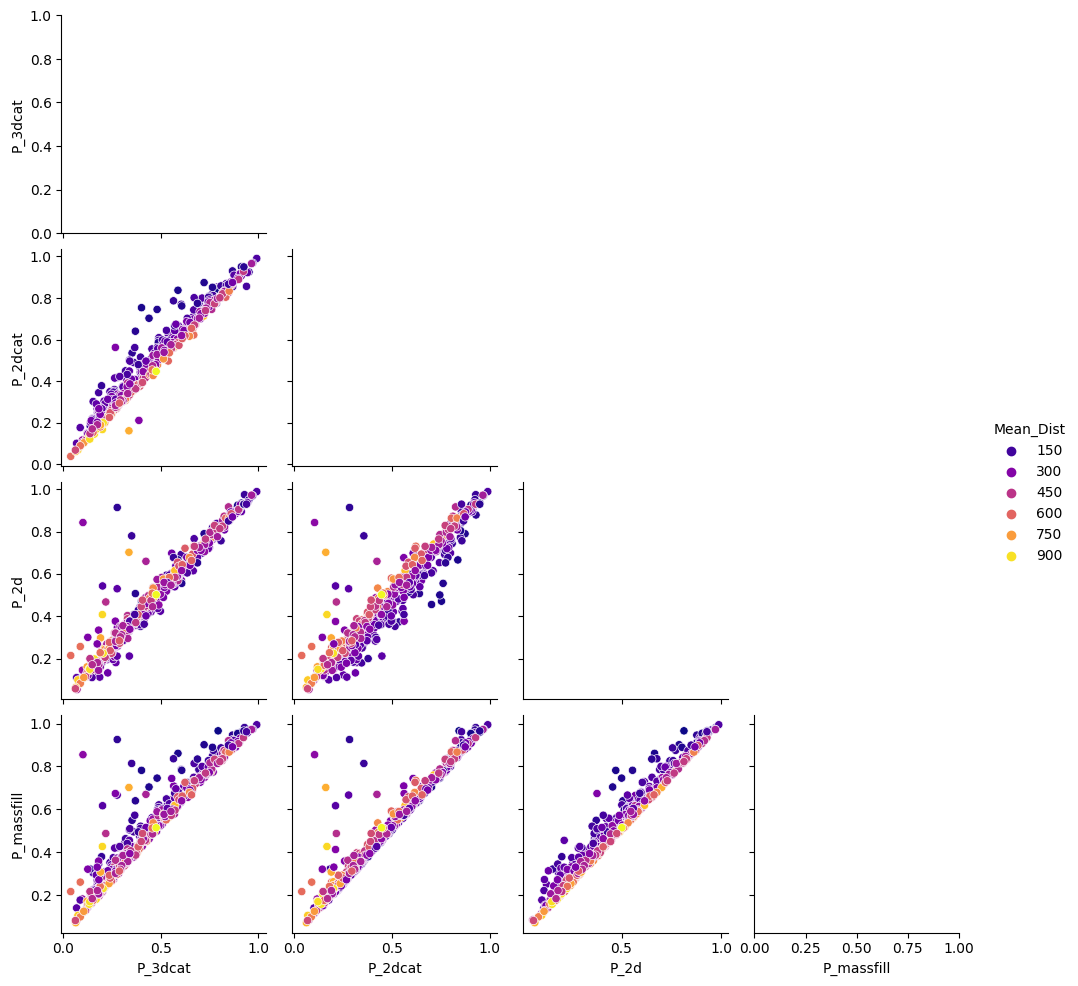

In [30]:
dn = d[['P_3dcat', 'P_2dcat', 'P_2d', 'P_massfill', 'Mean_Dist']]

#dn['DegArea'] = np.clip(dn['DegArea'], 0, 4000)

sns.pairplot(dn, corner=True, hue = 'Mean_Dist', palette = 'plasma', diag_kind="none")

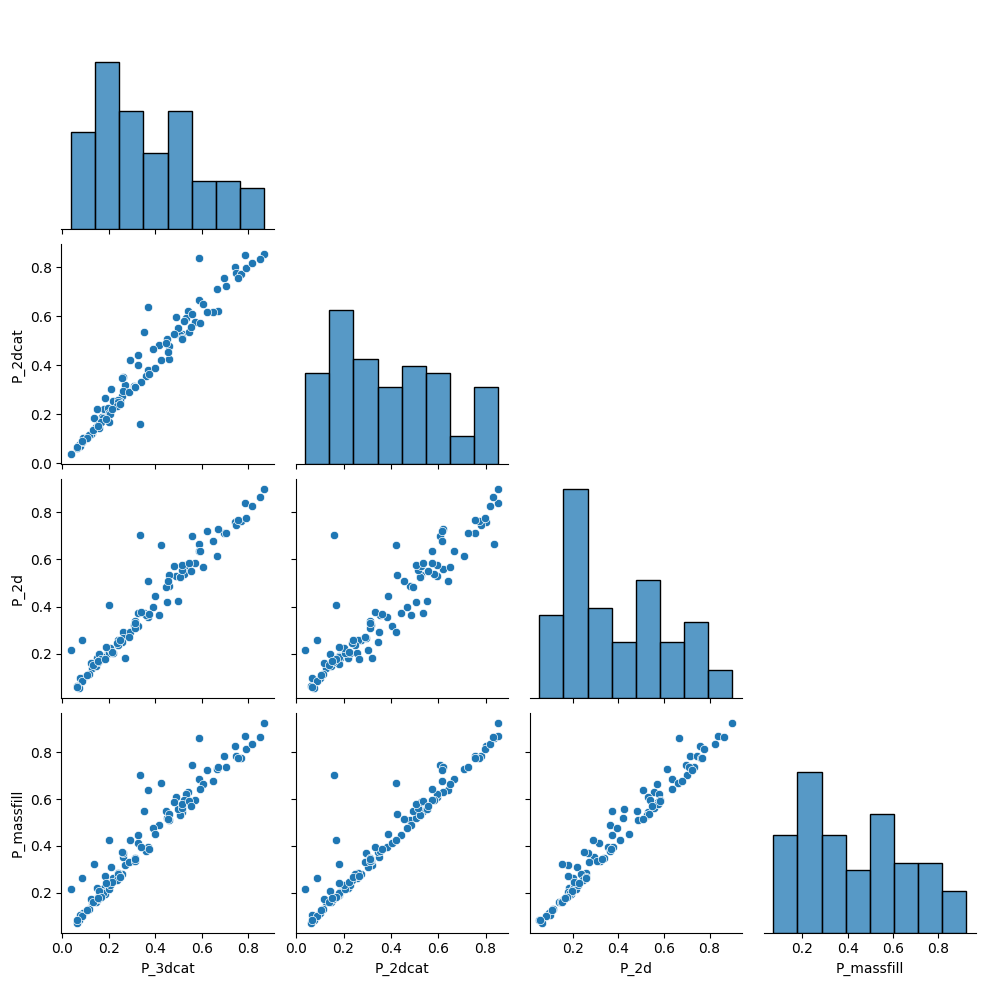

In [149]:
dn = d[['P_3dcat', 'P_2dcat', 'P_2d', 'P_massfill']]

#dn['DegArea'] = np.clip(dn['DegArea'], 0, 4000)

sns.pairplot(dn, corner=True)